## Line Plots
The <b>line plot</b> is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

We will make use of Matplotlib's errorbar() function, performing some processing on the data in order to get it into its necessary form.

Let's see some examples below.

#### Example 1.

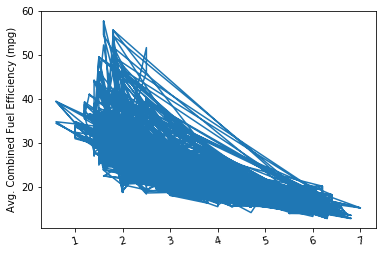

In [1]:
# TO DO: Necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Preparatory Step
fuel_econ = pd.read_csv('fuel_econ.csv')

plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

In [2]:
fuel_econ.comb.head()

0    18.7389
1    25.2227
2    20.6716
3    19.8774
4    28.6813
Name: comb, dtype: float64

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

#### Example 2.

A series object returned when the "fuel_econ['displl']" column passed to the "pandas.cut()" function

In [3]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0         (3.6, 3.8]
1         (1.8, 2.0]
2         (3.4, 3.6]
3         (3.4, 3.6]
4         (2.2, 2.4]
5         (3.4, 3.6]
6         (3.4, 3.6]
7         (1.8, 2.0]
8         (1.8, 2.0]
9         (3.6, 3.8]
10        (3.6, 3.8]
11        (1.8, 2.0]
12        (3.6, 3.8]
13        (3.4, 3.6]
14        (3.6, 3.8]
15        (3.6, 3.8]
16        (3.4, 3.6]
17        (3.4, 3.6]
18        (3.4, 3.6]
19        (3.4, 3.6]
20        (3.6, 3.8]
21        (3.6, 3.8]
22        (4.8, 5.0]
23        (4.8, 5.0]
24        (3.6, 3.8]
25        (1.4, 1.6]
26        (1.4, 1.6]
27        (1.4, 1.6]
28        (1.6, 1.8]
29        (1.6, 1.8]
            ...     
3899      (1.4, 1.6]
3900      (1.4, 1.6]
3901      (2.4, 2.6]
3902      (1.8, 2.0]
3903      (1.8, 2.0]
3904      (4.8, 5.0]
3905      (1.8, 2.0]
3906      (3.4, 3.6]
3907      (3.4, 3.6]
3908      (3.4, 3.6]
3909      (2.8, 3.0]
3910      (4.2, 4.4]
3911      (2.2, 2.4]
3912      (1.6, 1.8]
3913    (0.599, 0.8]
3914    (0.599, 0.8]
3915      (1.

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

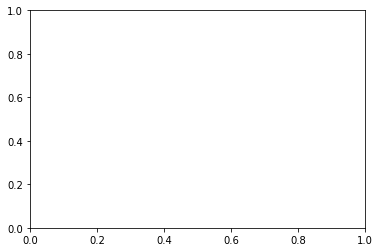

In [4]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');